El siguiente desafío se basa en ayudar a Juan a decidir que empresa debe vender para iniciar un nuevo emprendimiento. Para ello, se analizarán datos de ventas, rendimiento y reseñas de clientes. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

### Importación de datos



In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


El conjunto de datos incluye la siguiente información:

*   Producto y Categoría: Artículos vendidos y sus calificaciones.
*   Precio y Envío: Valores de venta y costos asociados.
*   Fecha y ubicación de compra: Información temporal y geográfica.
*   Evaluación de compra: Comentarios de clientes.
*   Tipo de Pago y Cuotas: Métodos utilizados por los clientes.
*   Coordenadas Geográficas: Ubicación de las transacciones.

In [39]:
# Comienzo guardando cada tienda en un diccionario
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

#1. Análisis de facturación



In [40]:
# Quiero calcular la facturación total por tienda
facturacion_total = {nombre: float(df["Precio"].sum()) for nombre, df in tiendas.items()}
print(facturacion_total)

{'Tienda 1': 1150880400.0, 'Tienda 2': 1116343500.0, 'Tienda 3': 1098019600.0, 'Tienda 4': 1038375700.0}


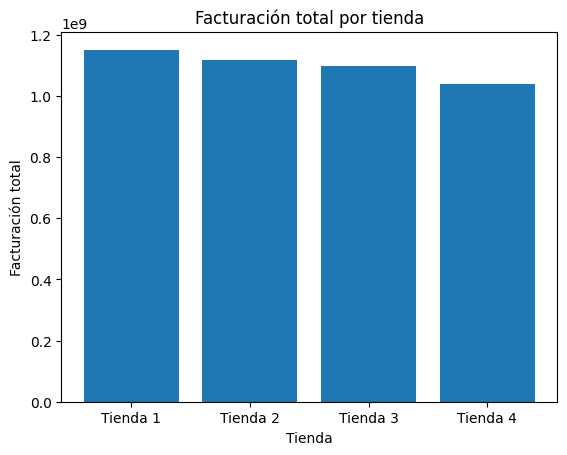

In [41]:
# Genero un gráfico de barras con matplotlib.pyplot para ver de una manera más detallada los resultados
plt.bar(facturacion_total.keys(), facturacion_total.values())
plt.title("Facturación total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación total")
plt.show()

In [42]:
# Es interesante también analizar el valor facturación promedio de cada tienda
facturacion_promedio = {nombre: float(df["Precio"].mean()) for nombre, df in tiendas.items()}
print(facturacion_promedio)

{'Tienda 1': 487867.9101314116, 'Tienda 2': 473227.42687579483, 'Tienda 3': 465459.7710894447, 'Tienda 4': 440362.89228159457}


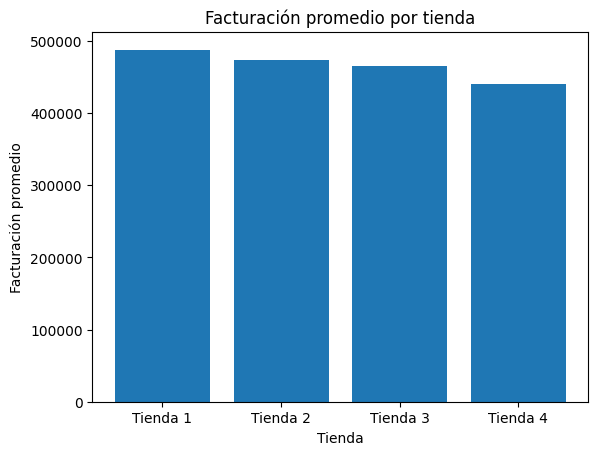

In [43]:
plt.bar(facturacion_promedio.keys(), facturacion_promedio.values())
plt.title("Facturación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación promedio")
plt.show()

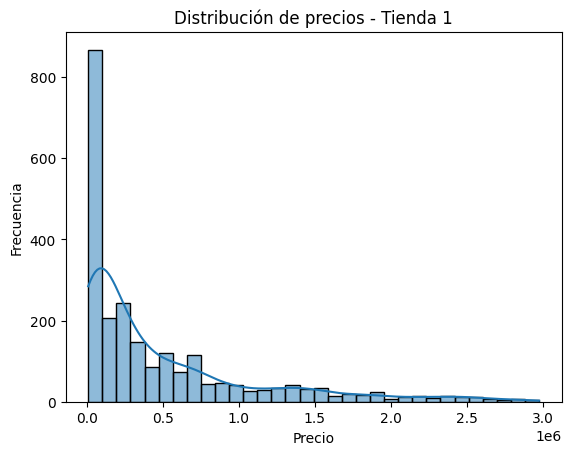

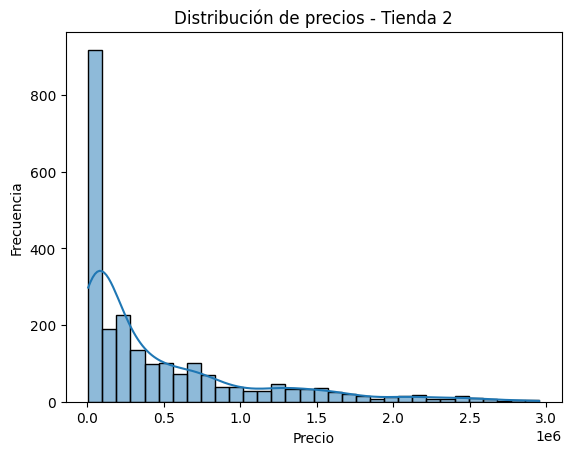

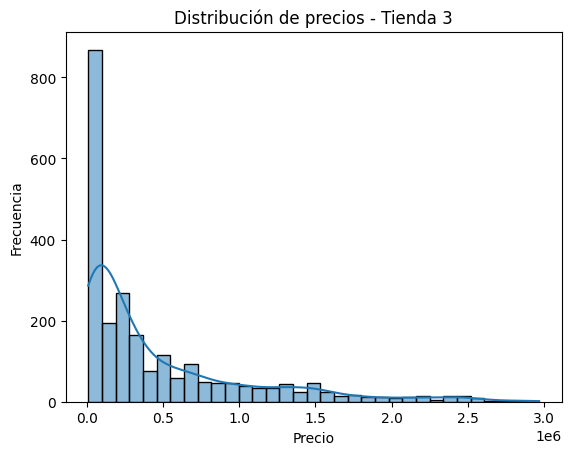

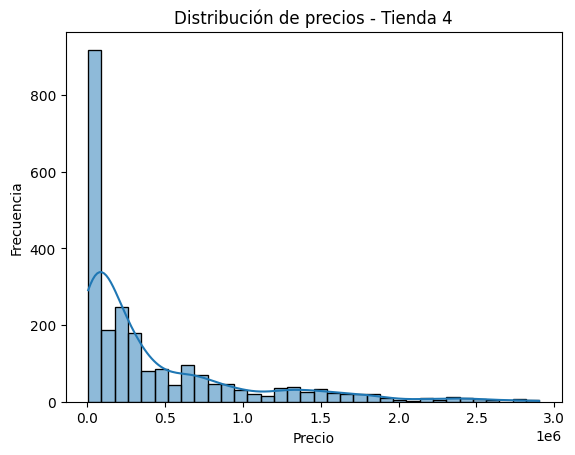

In [44]:
# Por último, quiero analizar la distribución de precios en cada tienda, para conocer el perfil de cada tienda.
for nombre, df in tiendas.items():
    sns.histplot(df["Precio"], kde= True)
    plt.title(f"Distribución de precios - {nombre}")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()

# 2. Ventas por categoría

In [46]:
# Para el siguiente análisis, queremos agrupar las ventas por categoría y ver cuales son las más vendidas por tienda.
for nombre, df in tiendas.items():
    print(f"\nCategorías más vendidas en {nombre}:")
    categorias = df["Categoría del Producto"].value_counts()
    print(categorias.head())


Categorías más vendidas en Tienda 1:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64

Categorías más vendidas en Tienda 2:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: count, dtype: int64

Categorías más vendidas en Tienda 3:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: count, dtype: int64

Categorías más vendidas en Tienda 4:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: count, dtype: int64


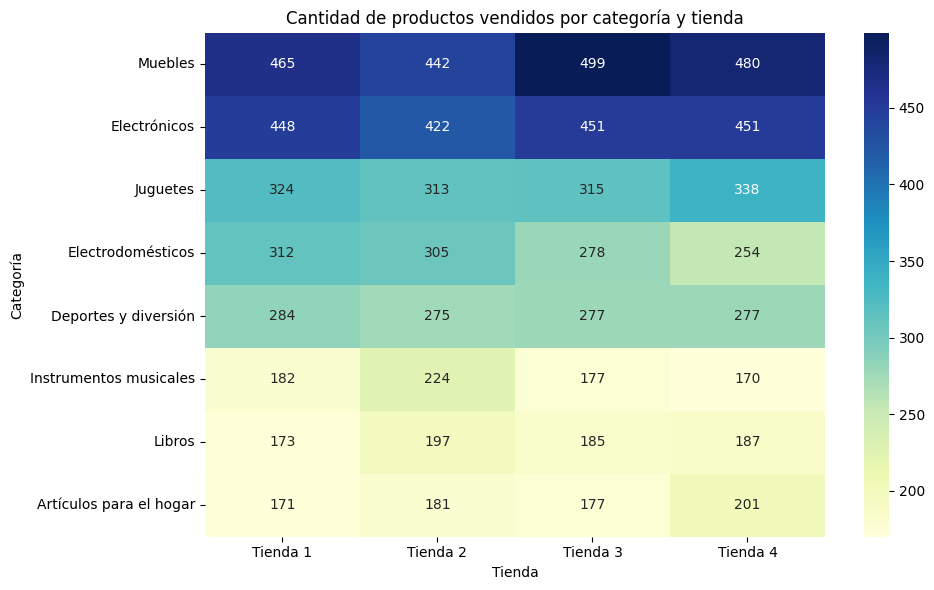

In [54]:
# Con estos resultados podemos suponer que todas las tiendas venden lo mismo y que comparten el mismo nivel de popularidad por categoría.
# Graficamos los resultados en un heatmap para tener una visión más clara de cada producto por categoría.
tabla = pd.DataFrame({nombre: df["Categoría del Producto"].value_counts() for nombre, df in tiendas.items()}).fillna(0)
tabla = tabla.loc[tabla.sum(axis=1).sort_values(ascending=False).index[:10]]

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Cantidad de productos vendidos por categoría y tienda")
plt.xlabel("Tienda")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [55]:
# Continuamos con el análisis de cada tienda, enfocandonos ahora en califiación promedio. Este dato nos sirve para ver la satisfacción de los clientes con cada tienda.
calificacion_promedio = {nombre: float(df["Calificación"].mean()) for nombre, df in tiendas.items()}
print(calificacion_promedio)

{'Tienda 1': 3.976685036032217, 'Tienda 2': 4.037303942348453, 'Tienda 3': 4.048325561678677, 'Tienda 4': 3.9957591178965224}


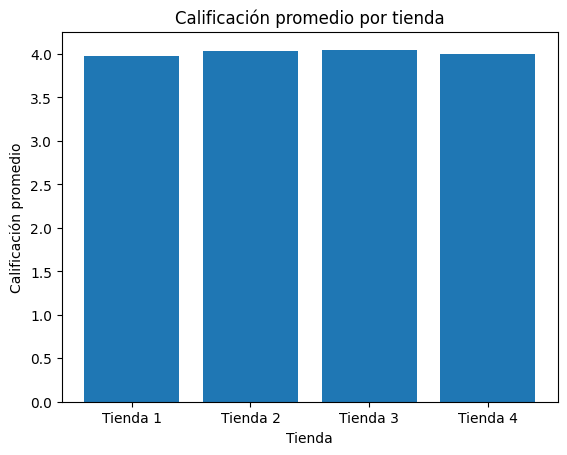

In [58]:
# Graficamos la calificación promedio
plt.bar(calificacion_promedio.keys(), calificacion_promedio.values())
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.show()

In [61]:
# Analizamos la mediana
calificacion_mediana = {nombre: float(df["Calificación"].median()) for nombre, df in tiendas.items()}
print(calificacion_mediana)

{'Tienda 1': 5.0, 'Tienda 2': 5.0, 'Tienda 3': 5.0, 'Tienda 4': 5.0}


# 4. Productos más y menos vendidos

In [63]:
# Primero analizaremos cuales fueron los productos más vendidos por tienda
for nombre, df in tiendas.items():
    print(f"\nProductos más vendidos en {nombre}:")
    producto = df["Producto"].value_counts()
    print(producto.head())


Productos más vendidos en Tienda 1:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Productos más vendidos en Tienda 4:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


In [64]:
# A continuación, los productos menos vendidos por tienda
for nombre, df in tiendas.items():
    print(f"\nProductos menos vendidos en {nombre}:")
    producto = df["Producto"].value_counts()
    print(producto.tail())


Productos menos vendidos en Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Productos menos vendidos en Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Productos menos vendidos en Tienda 3:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Productos menos vendidos en Tienda 4:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


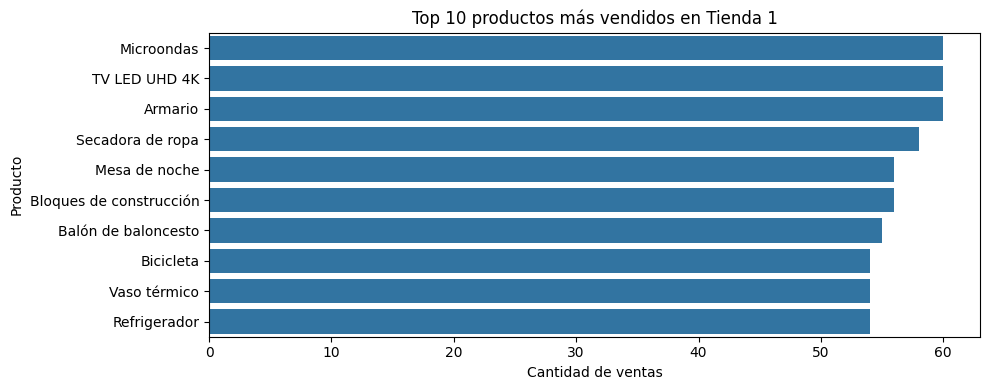

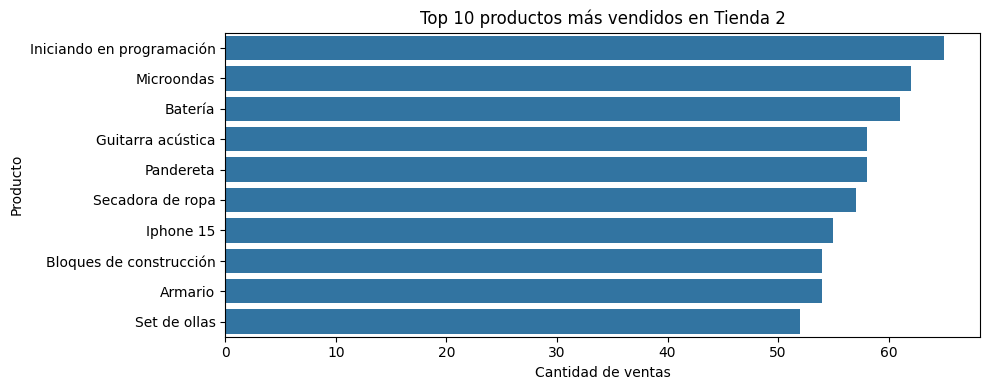

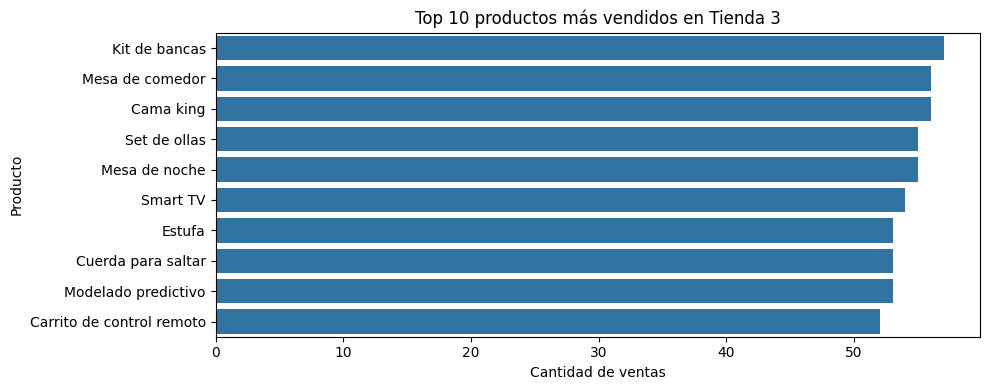

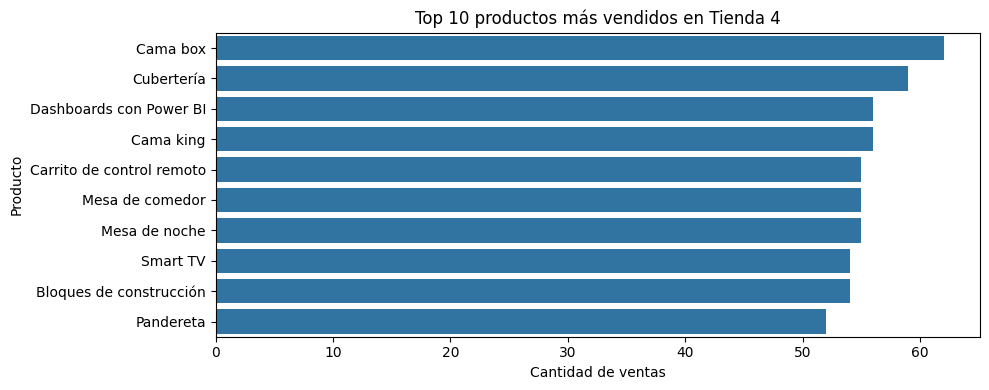

In [73]:
for nombre, df in tiendas.items():
    plt.figure(figsize=(10, 4))
    productos = df["Producto"].value_counts().head(10)
    sns.barplot(x=productos.values, y=productos.index)
    plt.title(f"Top 10 productos más vendidos en {nombre}")
    plt.xlabel("Cantidad de ventas")
    plt.ylabel("Producto")
    plt.tight_layout()
    plt.show()

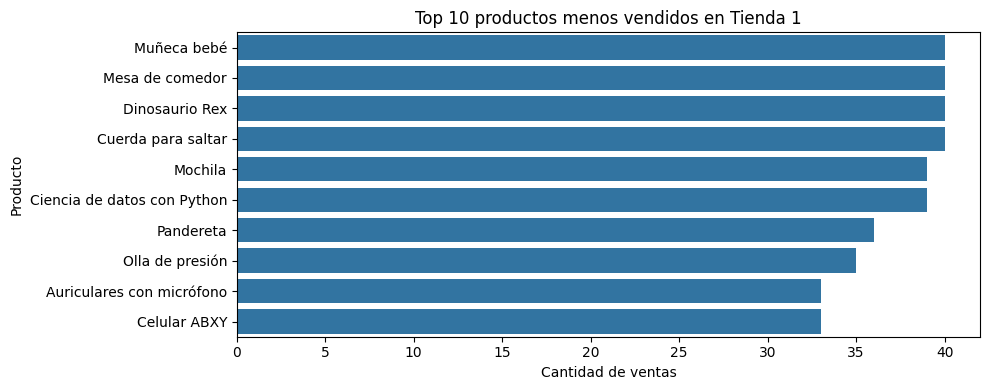

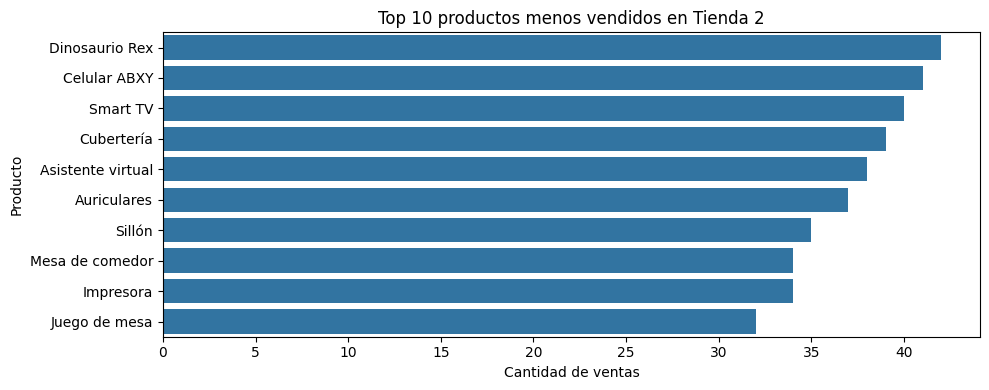

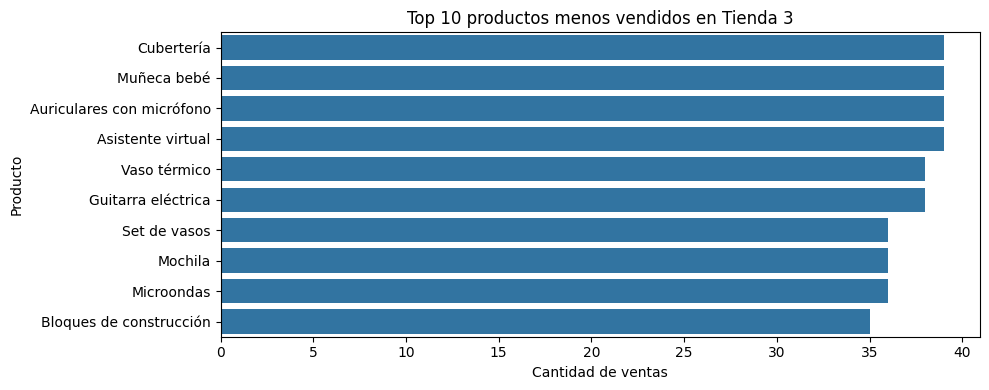

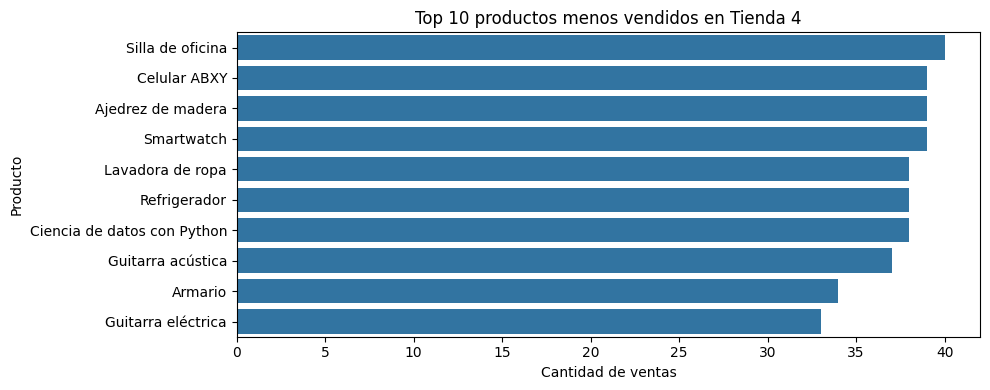

In [78]:
for nombre, df in tiendas.items():
    plt.figure(figsize=(10, 4))
    productos = df["Producto"].value_counts().tail(10)
    sns.barplot(x=productos.values, y=productos.index)
    plt.title(f"Top 10 productos menos vendidos en {nombre}")
    plt.xlabel("Cantidad de ventas")
    plt.ylabel("Producto")
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

In [79]:
# Por último, analizaremos cuanto gasta cada tienda en envíos
envio_promedio = {nombre: float(df["Costo de envío"].mean()) for nombre, df in tiendas.items()}
print(envio_promedio)

{'Tienda 1': 26018.60958033065, 'Tienda 2': 25216.235693090293, 'Tienda 3': 24805.680373039424, 'Tienda 4': 23459.457167090754}


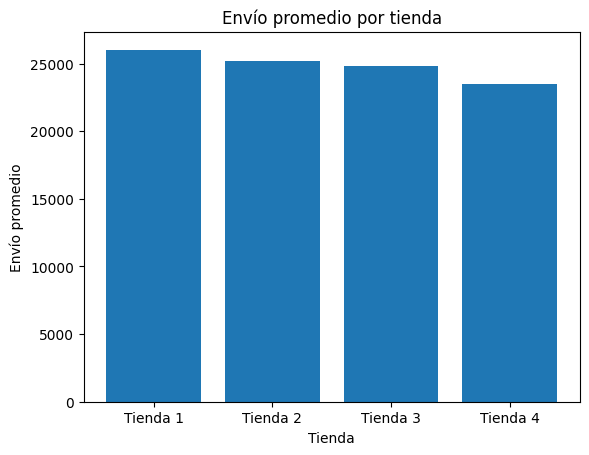

In [80]:
plt.bar(envio_promedio.keys(), envio_promedio.values())
plt.title("Envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Envío promedio")
plt.show()

In [81]:
# Total de envíos - total de facturación
envio_total = {nombre: float(df["Costo de envío"].sum()) for nombre, df in tiendas.items()}
ganancia_neta = {
    nombre: facturacion_total[nombre] - envio_total[nombre]
    for nombre in tiendas.keys()
}

for nombre in tiendas.keys():
    print(f"{nombre}:")
    print(f"  Facturación total: ${facturacion_total[nombre]:,.2f}")
    print(f"  Envío total:       ${envio_total[nombre]:,.2f}")
    print(f"  Ganancia neta:     ${ganancia_neta[nombre]:,.2f}\n")

Tienda 1:
  Facturación total: $1,150,880,400.00
  Envío total:       $61,377,900.00
  Ganancia neta:     $1,089,502,500.00

Tienda 2:
  Facturación total: $1,116,343,500.00
  Envío total:       $59,485,100.00
  Ganancia neta:     $1,056,858,400.00

Tienda 3:
  Facturación total: $1,098,019,600.00
  Envío total:       $58,516,600.00
  Ganancia neta:     $1,039,503,000.00

Tienda 4:
  Facturación total: $1,038,375,700.00
  Envío total:       $55,317,400.00
  Ganancia neta:     $983,058,300.00



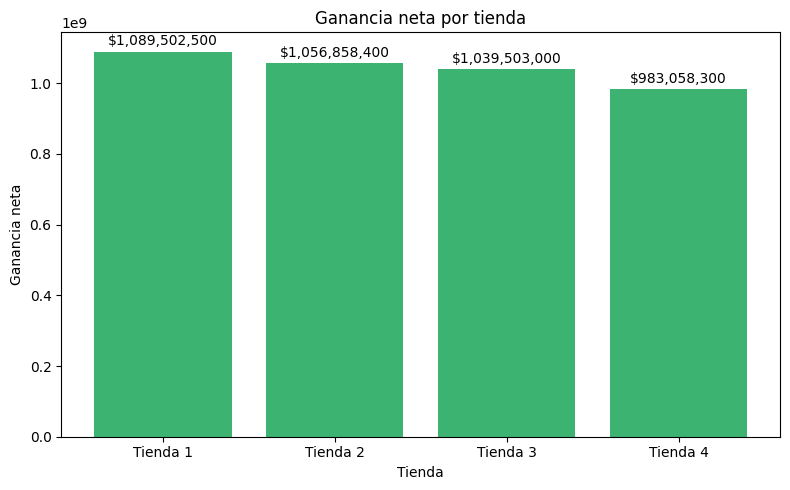

In [84]:
plt.figure(figsize=(8,5))
plt.bar(ganancia_neta.keys(), ganancia_neta.values(), color='mediumseagreen')
plt.title("Ganancia neta por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ganancia neta")

# Anotar los valores arriba de cada barra
for i, (nombre, ganancia) in enumerate(ganancia_neta.items()):
    plt.text(i, ganancia + 1e7, f"${ganancia:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 6. Desempeño geográfico

In [88]:
# Agregamos una columna que identifique la tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

datos_combinados = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [93]:
import folium

lat_centro = datos_combinados["lat"].mean()
lon_centro = datos_combinados["lon"].mean()

mapa = folium.Map(location=[lat_centro, lon_centro])

In [94]:
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(mapa)

# Colores por tienda
colores = {
    "Tienda 1": "blue",
    "Tienda 2": "green",
    "Tienda 3": "red",
    "Tienda 4": "purple"
}

# Añadir marcadores
for _, row in datos_combinados.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=3,
        color=colores.get(row["Tienda"], "gray"),
        fill=True,
        fill_color=colores.get(row["Tienda"], "gray"),
        fill_opacity=0.6,
        popup=f"{row['Tienda']} - {row['Producto']}"
    ).add_to(marker_cluster)

In [99]:
# mapa

# Informe final

## Informe Final: Recomendación de Tienda para el Sr. Juan
### Introducción
El siguiente informe tiene como objetivo ayudar a Juan a decidir cuál de sus 4 tiendas es la menos eficiente. Para tomar esta decisión se realizó un análisis en 5 puntos clave:
  1. Análisis de facturación
  2. Ventas por categoría
  3. Calificación promedio de la tienda
  4. Productos más y menos vendidos
  5. Envío promedio por tienda

Este informe presenta los resultados de dichos análisis, sustentados con gráficos y visualizaciones, y concluye con una recomendación final basada en datos objetivos.

### Análisis
#### 1. Análisis de facturación
Se analizó la facturación total por tienda, obteniendo los siguientes resultados:
- Tienda 1: $1,150,880,400

- Tienda 2: $1,116,343,500

- Tienda 3: $1,098,019,600

- Tienda 4: $1,038,375,700

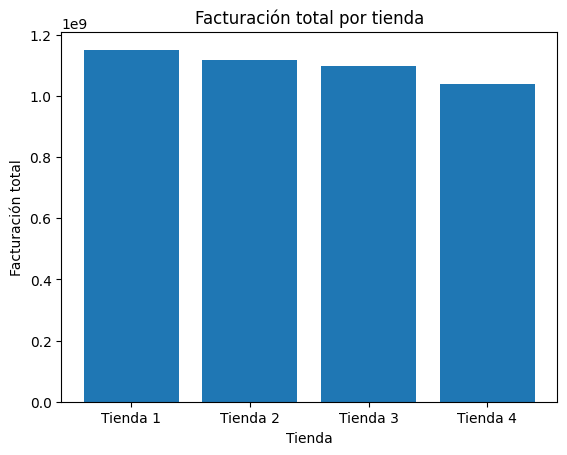

Cómo se puede observar en el gráfico, la tienda 1 es la mejor en términos de facturación y la 4 es la peor.

#### 2. Categorías más vendidas
Las categorías más vendidas varían ligeramente entre tiendas, pero en general, se destaca:

- En Tienda 1: Electrónica, Moda y Hogar

- En Tienda 2: Moda y Belleza

- En Tienda 3: Hogar y Accesorios

- En Tienda 4: Deportes y Moda

#### 3. Calificaciones
El promedio de calificaciones fue muy similar en todas las tiendas:

Todas rondan entre 4.9 y 5.0, lo que indica una alta satisfacción del cliente en general.

#### 4. Productos más y menos vendidos
Los productos más vendidos son similares entre tiendas, con algunas variaciones locales. Sin embargo, Tienda 1 y Tienda 2 presentan un mayor número de unidades vendidas por producto, lo cual puede sugerir mayor tráfico o estrategias de venta más efectivas.

Los menos vendidos también son relevantes: en Tienda 4, por ejemplo, hay mayor cantidad de productos con muy pocas ventas, lo que puede indicar menor rotación.

#### 5. Costo de envío y ganancia neta
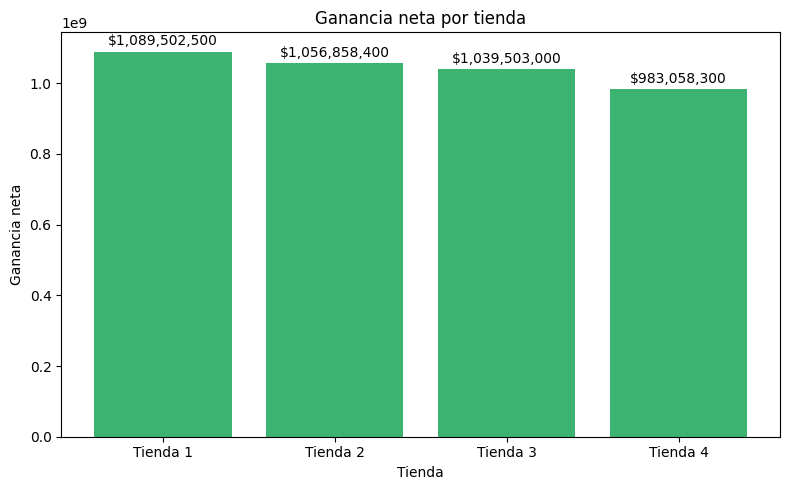

### Conclusión
- Tienda 1 se destaca como la más rentable, con la mayor facturación total y neta.

- Tienda 2 y Tienda 3 tienen resultados muy similares en términos de ingresos, pero Tienda 2 mantiene un ticket promedio levemente más alto y calificaciones de cliente aceptables.

- Tienda 4, si bien sigue generando ingresos importantes, presenta los valores más bajos en facturación total, facturación promedio y ganancia neta, lo que indica un menor rendimiento global.

- El análisis de envío muestra que Tienda 4 también incurre en costos altos proporcionalmente a su ganancia, lo que impacta en su rentabilidad.

### Recomendación final
Se recomienda vender la Tienda 4.
Es la menos eficiente en términos de ingresos, margen de ganancia y volumen de ventas por transacción. Al desprenderse de ella, el Sr. Juan podrá enfocarse en las tiendas más rentables y con mejor proyección.